In [2]:
import pandas as pd
df = pd.read_csv('/content/gender_submission.csv')
print(df.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include='object'):
    data[col] = encoder.fit_transform(data[col])

In [6]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [7]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [8]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
    )

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [19]:
y_pred = model.predict(x_test)


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

In [21]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

Accuracy 0.5238095238095238


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("Confusion matrix:")
print("TP FP")
print("FN TN")
print(cm)

Confusion matrix:
TP FP
FN TN
[[18 16]
 [24 26]]


In [23]:
precision = precision_score(y_test,y_pred,zero_division=0)
print("Precision",precision)

Precision 0.42857142857142855


In [24]:
recall = recall_score(y_test,y_pred,zero_division=0)
print("Recall",recall)

Recall 0.5294117647058824


In [25]:
f1 = f1_score(y_test,y_pred,zero_division=0)
print("F1-score:",f1)

F1-score: 0.47368421052631576


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
cm = confusion_matrix(y_test,y_pred,labels=[1,0])

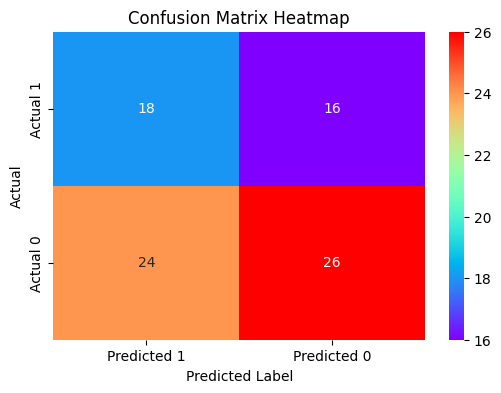

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='rainbow',
            xticklabels=['Predicted 1','Predicted 0'],
            yticklabels=['Actual 1','Actual 0'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [31]:
from sklearn.metrics import roc_curve, auc

In [32]:
y_prob = model.predict_proba(x_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_prob)

In [34]:
fpr, tpr, thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)
print("AUC:",roc_auc)

AUC: 0.5229411764705882


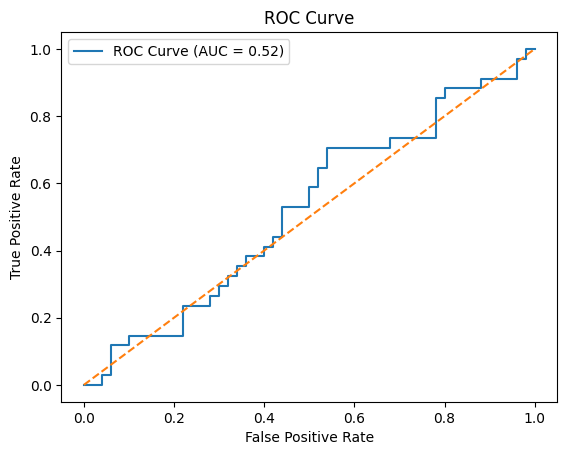

In [35]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()